<a href="https://colab.research.google.com/github/MuhammadRaynaldi/Python-Project/blob/main/RealProject2_Wind_Energy_Modelling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install windpowerlib **

In [12]:
#https://windpowerlib.readthedocs.io/en/stable/ link
!pip install windpowerlib

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import ModelChain,WindTurbine
from windpowerlib import data as wt


**Reading Weather Data**

In [ ]:
# https://power.larc.nasa.gov/ for wind daTabase

In [4]:
Weather_Data = pd.read_csv('weather_montreal.csv',index_col=0,header=[0,1],
                           date_parser=lambda idx:pd.to_datetime(idx,utc=True))
Weather_Data

variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,99430,271.17,2.39,0.15,271.07,3.93
2019-12-31 20:00:00+00:00,99400,271.35,2.59,0.15,271.25,4.69
2019-12-31 21:00:00+00:00,99370,271.69,3.28,0.15,271.59,6.39


**Wind Turbine Selection**

In [19]:
Turbine_lib = wt.get_turbine_types(print_out=False)
# Turbine_lib = wt.get_turbine_types()
# Turbine_lib #Example for 17 Enerco, E48/800, 800 (power output in kiowatts unit) and model E48

In [20]:
Selected_turbine = {'turbine_type': 'E48/800', 'hub_height': 60}
W_Turbine = WindTurbine(**Selected_turbine)

In [25]:
Turbine_Sub_Models = {
    'wind_speed_model':'hellman', # we can use 3 model, 1. hellman, 2. logarithmic (default), 3. interpolation-extrapolation
    'density_model':'ideal_gas',  #3 model, 1. Barometric (default), 2. ideal_gas, 3.interpolation-extrapolation
    'temperature_model':'linear_gradient', #other model, interpolation-extrapolation

    'power_output_model': 'power_coefficient_curve', # 'power curve is the default'
    'density_correction': True,   #False (default)
    'obstacle_height': 0,         #default is 0
    'hellman_exp':0.25
}

In [26]:
Model = ModelChain(W_Turbine,**Turbine_Sub_Models).run_model(Weather_Data)

In [28]:
Turbine_Power_Output = (Model.power_output)/1000 #for kW unit
Turbine_Power_Output

2019-01-01 00:00:00+00:00    607.007263
2019-01-01 01:00:00+00:00    632.135315
2019-01-01 02:00:00+00:00    518.769474
2019-01-01 03:00:00+00:00    167.707041
2019-01-01 04:00:00+00:00      1.009322
                                ...    
2019-12-31 19:00:00+00:00     28.706123
2019-12-31 20:00:00+00:00     57.379249
2019-12-31 21:00:00+00:00    160.043377
2019-12-31 22:00:00+00:00    289.477526
2019-12-31 23:00:00+00:00    271.784218
Name: feedin_power_plant, Length: 8760, dtype: float64

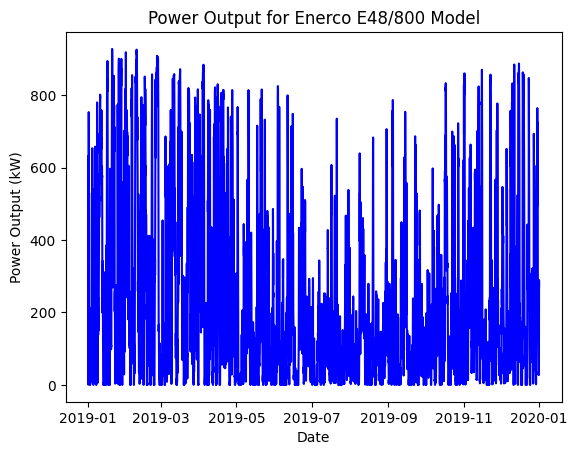

In [36]:
plt.plot(Turbine_Power_Output, c = 'blue')
plt.xlabel('Date')
plt.ylabel('Power Output (kW)')
plt.title('Power Output for Enerco E48/800 Model')
plt.show()